<a href="https://colab.research.google.com/github/Sudheer1107/github-slideshow/blob/master/dc%20lab%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

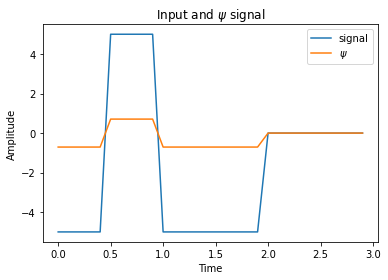

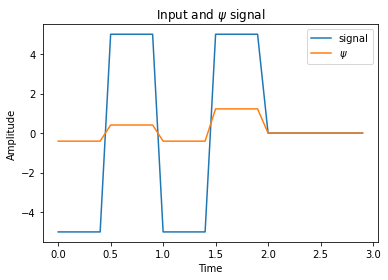

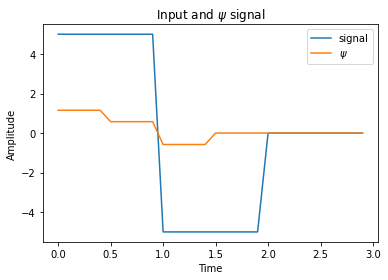

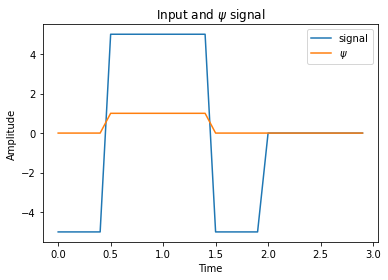

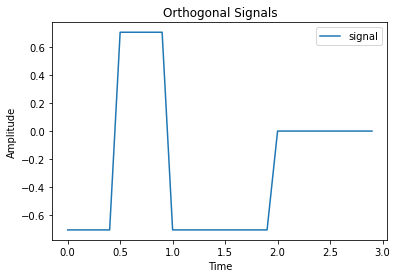

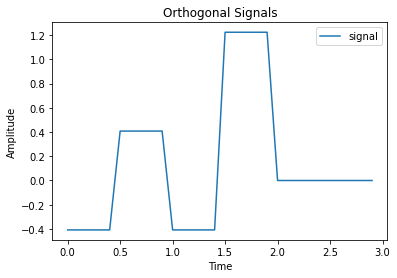

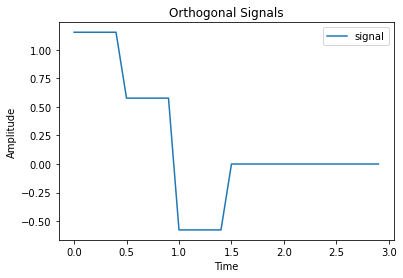

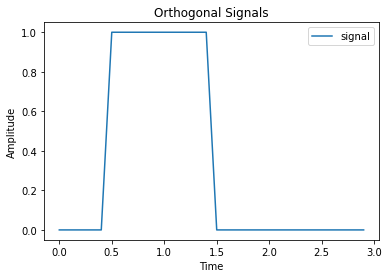

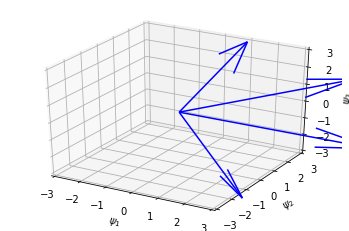

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.mplot3d import Axes3D

#Determine Basis signals
#Determine signal vectors
#Plot signal space vectors

def c_value(s, p_array, fs): # Projection of Signal to ON Basis Function
    c_array = []
    for i in range(len(p_array)):
        c_array.append(np.sum(s*p_array[i])/fs)
    return c_array

def E(s):
    return sum(abs(s)**2.0)/10

def d_value(s, c_array, p_array, length): # Orthogonal Function to ON Basis
    d = np.zeros(length)
    for i in range(len(c_array)):
        d -= c_array[i] * p_array[i]
    d += s
    return d

def comparison(a, b): # To 
    flag = 0
    for i in range(len(a)):
        if abs(a[i] - b[i]) > 10**(-5):
            flag = 1
            break
    if flag == 0:
        return True
    else:
        return False
      
def signal_vector(signals, orthogonal, fs): # Generation of Rectangular Pulses
    result = []
    for i in range(len(signals)):
        l = []
        for j in range(len(orthogonal)):
            l.append(np.sum(signals[i]*orthogonal[j])/fs)
        result.append(l)
    return result

########################################################################            
fs = 10
time = np.arange(0, 2, 1/fs)
long_time = np.arange(0, 3, 1/fs)

s1 = np.zeros(len(long_time))
for i in range(len(time)//4):
    s1[i] = -5
for i in range(len(time)//4):
    s1[i+len(time)//4] = 5
for i in range(len(time)//4):
    s1[i+len(time)//2] = -5
for i in range(len(time)//4):
    s1[i+len(time)//2+len(time)//4] = -5
    

s2 = np.zeros(len(long_time))
for i in range(len(time)//4):
    s2[i] = -5
for i in range(len(time)//4):
    s2[i+len(time)//4] = 5
for i in range(len(time)//4):
    s2[i+len(time)//2] = -5
for i in range(len(time)//4):
    s2[i+len(time)//2+len(time)//4] = 5

s3 = np.zeros(len(long_time))
for i in range(len(time)//4):
    s3[i] = 5
for i in range(len(time)//4):
    s3[i+len(time)//4] = 5
for i in range(len(time)//4):
    s3[i+len(time)//2] = -5
for i in range(len(time)//4):
    s3[i+len(time)//2+len(time)//4] = -5

s4 = np.zeros(len(long_time))
for i in range(len(time)//4):
    s4[i] = -5
for i in range(len(time)//4):
    s4[i+len(time)//4] = 5
for i in range(len(time)//4):
    s4[i+len(time)//2] = 5
for i in range(len(time)//4):
    s4[i+len(time)//2+len(time)//4] = -5


signals = [s1, s2, s3, s4]
signal_count = 4
#########################################################################

c_array = [0]*signal_count
p_array = [np.zeros(len(long_time))]*signal_count

orthogonal_signals = [] 

for i in range(signal_count):
    #print(signals[i])
    c_array = c_value(signals[i], p_array, fs)
    d = d_value(signals[i], c_array, p_array, len(long_time))
    energy = np.sqrt(E(d))
    p_array[i] = d / energy
    d = np.around(d, 4)
    if not comparison(d, np.zeros(len(long_time))):
        orthogonal_signals.append(p_array[i])
    
    plt.figure(i+1)
    plt.title("Input and $\psi$ signal")
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.plot(long_time, signals[i], label = 'signal')
    plt.plot(long_time, p_array[i], label = "$\psi$")
    plt.legend()
    plt.show()

for i in range(len(orthogonal_signals)):
    plt.figure(signal_count+i+1)
    plt.title("Orthogonal Signals")
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.plot(long_time, orthogonal_signals[i], label = 'signal')
    plt.legend()
    plt.show()

s_vector = signal_vector(signals, orthogonal_signals, fs)
s_vector = np.around(s_vector, 4)

start = [0, 0, 0]
limits = [-3,3]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(s_vector)):
    ax.quiver(start[0], start[1], start[2], s_vector[i][0], s_vector[i][1], s_vector[i][2], color='b')
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.set_zlim(limits)
    ax.set_xlabel("$\psi_1$")
    ax.set_ylabel("$\psi_2$")
    ax.set_zlabel("$\psi_3$")
    plt.draw()
plt.show()